In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
train_df = pd.read_csv("birdclef-2025/train.csv")
train_df.head()

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0


In [5]:
taxonomy_df = pd.read_csv("birdclef-2025/taxonomy.csv")
taxonomy_df.head()

,primary_label,inat_taxon_id,scientific_name,common_name,class_name
0,1139490,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta
1,1192948,1192948,Oxyprora surinamensis,Oxyprora surinamensis,Insecta
2,1194042,1194042,Copiphora colombiae,Copiphora colombiae,Insecta
3,126247,126247,Leptodactylus insularum,Spotted Foam-nest Frog,Amphibia
4,1346504,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus,Insecta


In [6]:
all_names = taxonomy_df["common_name"]
print(f"Number of common names: {len(all_names)}")


Number of common names: 206


In [7]:
names_train = train_df["common_name"]
names_train_unique = names_train.unique()
print(f"Number of unique common names in train: {len(names_train_unique)}")

Number of unique common names in train: 206


In [8]:
val_counts = names_train.value_counts()
val_counts

common_name
Great Kiskadee                     990
Common Pauraque                    808
Tropical Kingbird                  787
Roadside Hawk                      709
Bananaquit                         610
                                  ... 
Colombian Plump Frog                 2
Brown-throated Three-toed Sloth      2
Collared Peccary                     2
Crab-eating Fox                      2
Ragoniella pulchella                 2
Name: count, Length: 206, dtype: int64

<Axes: title={'center': 'Number of train samples per common name'}, xlabel='common_name'>

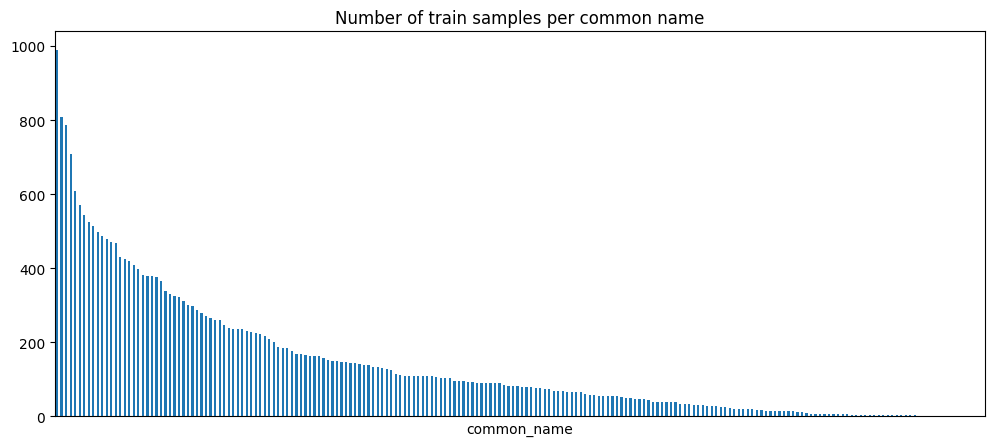

In [9]:
names_train.value_counts().plot(kind="bar", figsize=(12, 5), title="Number of train samples per common name", xticks=[])

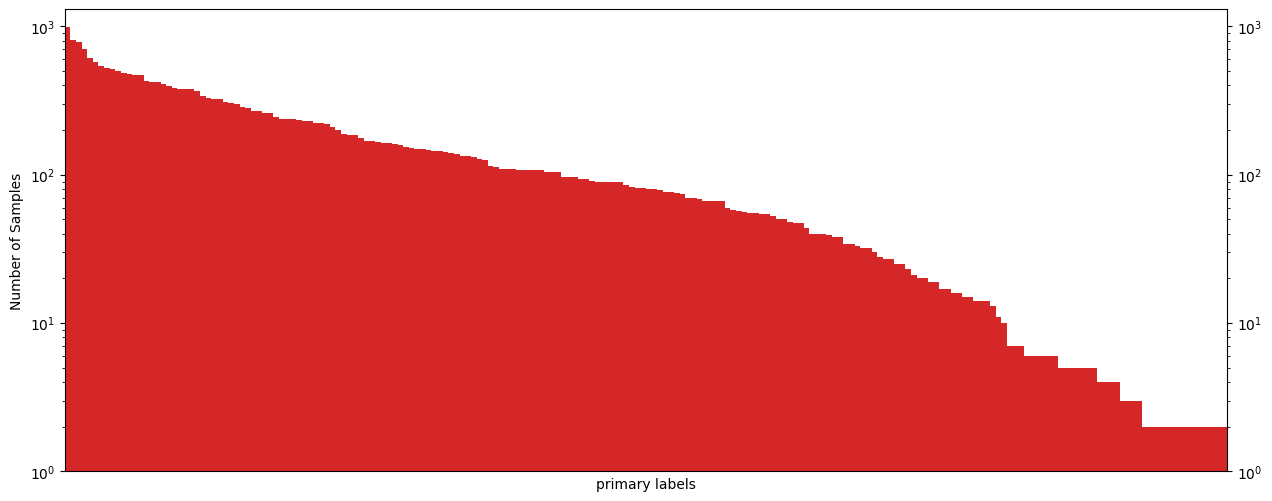

In [10]:
counts = val_counts.values
matplotlib.rcParams['figure.dpi'] = 100
plt.figure(figsize=(15, 6))
plt.bar(range(len(counts)), counts, width=1, color="tab:red")
plt.xlim(-0.5, len(counts)-0.5)
plt.yscale("log")
plt.xticks([])
plt.xlabel("primary labels")
plt.ylabel("Number of Samples")
plt.ylim(1,10e2+300)
plt.tick_params(labeltop=False, labelright=True, which ="both", right=True)


In [11]:
primary_labels = train_df["primary_label"]
primary_labels_unique = primary_labels.unique()
print(f"Number of unique primary labels in train: {len(primary_labels_unique)}")

Number of unique primary labels in train: 206


In [12]:
secondary_labels = train_df["secondary_labels"]
all_secondary_labels = []
for labels in secondary_labels:
    if labels != "['']":
        labels = labels.replace("'", "").replace("[", "").replace("]", "")
        all_secondary_labels.extend(labels.split(", "))
all_secondary_labels = pd.Series(all_secondary_labels)
all_secondary_labels.drop(all_secondary_labels[all_secondary_labels==''].keys(), inplace=True)
secondary_labels_unique = pd.Series(all_secondary_labels.unique())
print(f"Number of unique secondary labels in train: {len(secondary_labels_unique)}")

Number of unique secondary labels in train: 132


In [13]:
primary_labels_grouped = primary_labels.groupby(primary_labels).count().sort_values(ascending=False)
secondary_labels_grouped = secondary_labels.groupby(all_secondary_labels).count().sort_values(ascending=False)


In [14]:
merged_label_counts = pd.merge(primary_labels_grouped, secondary_labels_grouped, how="left", left_index=True, right_index=True)
merged_label_counts

,primary_label,secondary_labels
primary_label,,
grekis,990,489.0
compau,808,44.0
trokin,787,188.0
roahaw,709,2.0
banana,610,104.0
...,...,...
476537,2,NaN
47067,2,NaN
42113,2,NaN


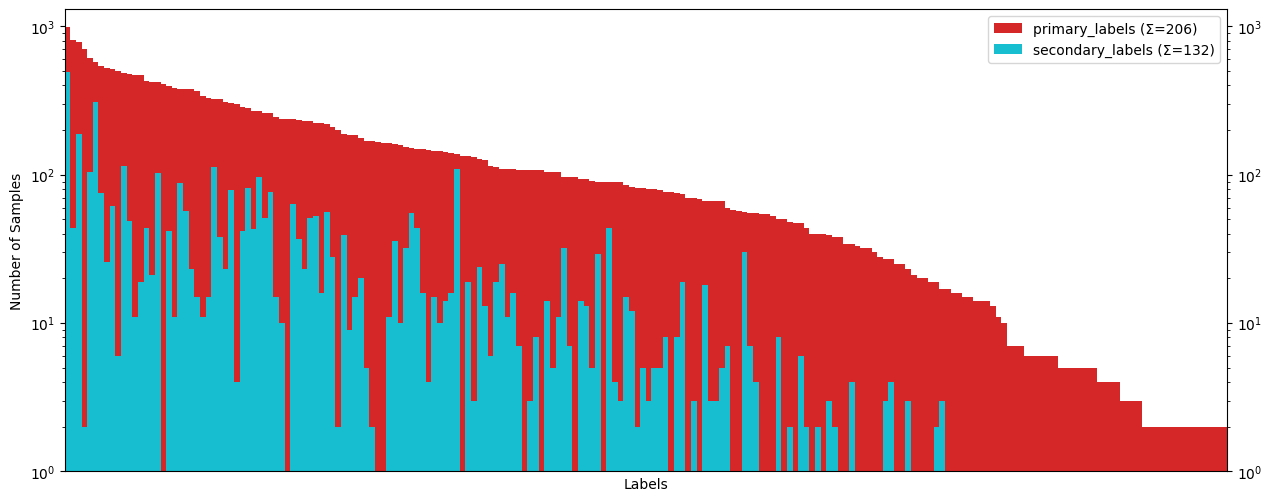

In [15]:
matplotlib.rcParams['figure.dpi'] = 100
plt.figure(figsize=(15, 6))
plt.bar(range(len(primary_labels_grouped)), merged_label_counts["primary_label"], width=1, color="tab:red", label=f"primary_labels (Σ={len(primary_labels_grouped)})")
plt.bar(range(len(primary_labels_grouped)), merged_label_counts["secondary_labels"], width=1, color="tab:cyan", label=f"secondary_labels (Σ={len(secondary_labels_grouped)})")
plt.xlim(-0.5, len(counts)-0.5)
plt.yscale("log")
plt.xticks([])
plt.xlabel("Labels")
plt.ylabel("Number of Samples")
plt.ylim(1,10e2+300)
plt.tick_params(labeltop=False, labelright=True, which ="both", right=True)
plt.legend(loc="upper right")
plt.text
plt.savefig("scarcity_plot.png", dpi=300)
plt.savefig("scarcity_plot.svg", dpi=600)

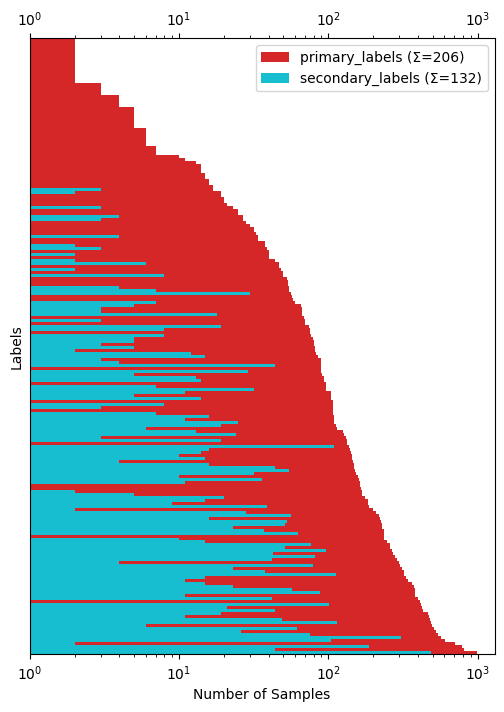

In [36]:
matplotlib.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6, 8))  # Swapped dimensions for horizontal orientation
plt.barh(range(len(primary_labels_grouped)), merged_label_counts["primary_label"], height=1, color="tab:red", label=f"primary_labels (Σ={len(primary_labels_grouped)})")
plt.barh(range(len(primary_labels_grouped)), merged_label_counts["secondary_labels"], height=1, color="tab:cyan", label=f"secondary_labels (Σ={len(secondary_labels_grouped)})")
plt.ylim(-0.5, len(counts)-0.5)  # Changed from xlim to ylim
plt.xscale("log")  # Changed from yscale to xscale
plt.yticks([])  # Changed from xticks to yticks
plt.ylabel("Labels")  # Swapped labels
plt.xlabel("Number of Samples")
plt.xlim(1,10e2+300)  # Changed from ylim to xlim
plt.tick_params(labeltop=True, labelright=False, which="both", top=True)  # Adjusted tick parameters
plt.legend(loc="upper right")
plt.savefig("scarcity_plot_horizontal.png", dpi=300)

C:\Users\maxge\AppData\Local\Temp\ipykernel_8224\902353303.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale("log")  # Log scale for x-axis
C:\Users\maxge\AppData\Local\Temp\ipykernel_8224\902353303.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-10e2-300, -1)


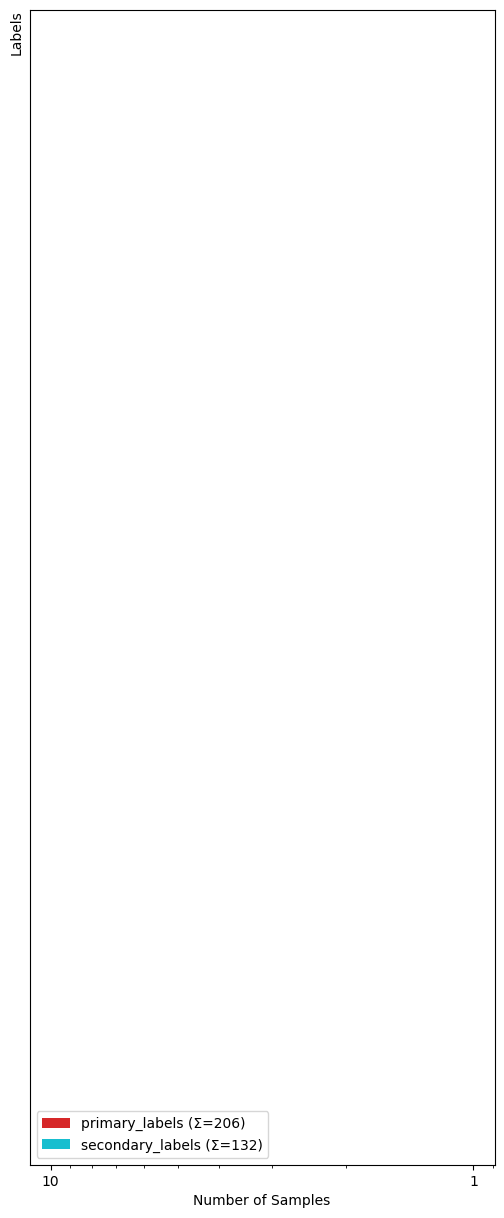

In [35]:
matplotlib.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6, 15))  # Swapped dimensions for horizontal orientation

# Make bars negative to go from right to left
plt.barh(range(len(primary_labels_grouped)), -merged_label_counts["primary_label"], height=1, color="tab:red", label=f"primary_labels (Σ={len(primary_labels_grouped)})")
plt.barh(range(len(primary_labels_grouped)), -merged_label_counts["secondary_labels"], height=1, color="tab:cyan", label=f"secondary_labels (Σ={len(secondary_labels_grouped)})")

plt.ylim(-0.5, len(counts)-0.5)  # Y-axis limits
plt.gca().invert_xaxis()  # Invert x-axis to show larger values on the right
plt.xscale("log")  # Log scale for x-axis
plt.yticks([])  # No y-tick labels

# Position labels on the right side
plt.ylabel("Labels", loc="top")  
plt.xlabel("Number of Samples")

# Set x-axis limits with negative values
plt.xlim(-10e2-300, -1)  

# Adjust tick parameters - labels on the bottom and right
plt.tick_params(labeltop=False, labelbottom=True, labelright=True, labelleft=False, 
                which="both", bottom=True, top=False, right=True, left=False)

# Format x-tick labels to show positive values despite negative data
from matplotlib.ticker import FuncFormatter
def abs_formatter(x, pos):
    return f"{abs(x):.0f}"
plt.gca().xaxis.set_major_formatter(FuncFormatter(abs_formatter))

plt.legend(loc="lower left")  # Move legend to lower left since we're inverted
#plt.savefig("scarcity_plot.png", dpi=300)
#plt.savefig("scarcity_plot.svg", dpi=600)